In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix, classification_report
pd.set_option('display.max_columns', 1000)

In [297]:
df = pd.read_excel("Interview Exercise-Employee Attrition.xlsx", sheet_name = 1)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      1470 non-null   int64 
 1   attrition                1470 non-null   bool  
 2   businesstravel           1470 non-null   object
 3   department               1470 non-null   object
 4   education                1470 non-null   int64 
 5   employeenumber           1470 non-null   int64 
 6   environmentsatisfaction  1470 non-null   int64 
 7   gender                   1470 non-null   object
 8   jobrole                  1470 non-null   object
 9   jobsatisfaction          1470 non-null   int64 
 10  maritalstatus            1470 non-null   object
 11  monthlyincome            1470 non-null   int64 
 12  numcompaniesworked       1470 non-null   int64 
 13  performancerating        1470 non-null   int64 
 14  totalworkingyears        1470 non-null  

**Creating Numerical Columns for Categorical Columns**

In [299]:
mappings = {}
columns = ['businesstravel', 'department', 'gender', 'jobrole', 'maritalstatus']

for col in columns:
    df[col + '_numerical'] = label_encoder.fit_transform(df[col])
    mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for col, map in mappings.items():
    print(f"Mapping for {col}: {map}")

Mapping for businesstravel: {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Mapping for department: {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Mapping for gender: {'Female': 0, 'Male': 1}
Mapping for jobrole: {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Mapping for maritalstatus: {'Divorced': 0, 'Married': 1, 'Single': 2}


In [300]:
df['attrition_encoded'] = df['attrition'].astype(int)

In [301]:
df.head()

,age,attrition,businesstravel,department,education,employeenumber,environmentsatisfaction,gender,jobrole,jobsatisfaction,maritalstatus,monthlyincome,numcompaniesworked,performancerating,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_numerical,department_numerical,gender_numerical,jobrole_numerical,maritalstatus_numerical,attrition_encoded
0,51,False,Travel_Rarely,Research & Development,4,116,4,Male,Laboratory Technician,4,Married,2075,3,4,10,4,3,4,2,0,3,2,1,1,2,1,0
1,51,False,Travel_Rarely,Sales,4,120,3,Male,Sales Executive,4,Single,5441,0,4,11,2,1,10,7,1,0,2,2,1,7,2,0
2,51,False,Travel_Frequently,Research & Development,4,145,1,Female,Healthcare Representative,1,Single,7484,3,4,23,1,2,13,12,12,8,1,1,0,0,2,0
3,51,False,Travel_Rarely,Research & Development,3,162,1,Male,Research Director,3,Single,19537,7,3,23,5,3,20,18,15,15,2,1,1,5,2,0
4,51,True,Travel_Frequently,Research & Development,4,179,1,Male,Manufacturing Director,4,Single,10650,2,3,18,2,3,4,2,0,3,1,1,1,4,2,1


**Checking to see if there is any Missing Values in the DataFrame**

In [255]:
total_missing_vals = df.isnull().sum().sort_values(ascending=False)
total_missing_vals

age                         0
attrition                   0
jobrole_numerical           0
gender_numerical            0
department_numerical        0
businesstravel_numerical    0
yearswithcurrmanager        0
yearssincelastpromotion     0
yearsincurrentrole          0
yearsatcompany              0
worklifebalance             0
trainingtimeslastyear       0
totalworkingyears           0
performancerating           0
numcompaniesworked          0
monthlyincome               0
maritalstatus               0
jobsatisfaction             0
jobrole                     0
gender                      0
environmentsatisfaction     0
employeenumber              0
education                   0
department                  0
businesstravel              0
maritalstatus_numerical     0
dtype: int64

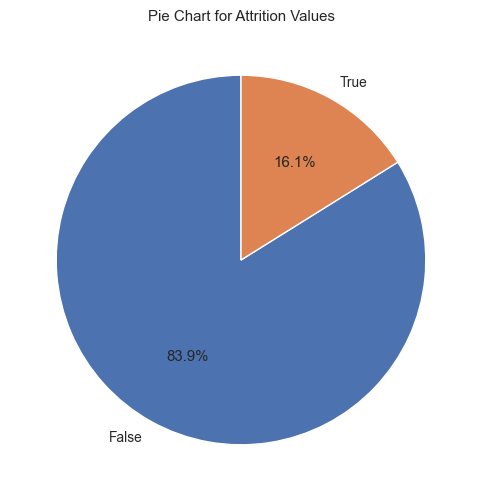

In [256]:
attrition_counts = df['attrition'].value_counts()
plt.figure(figsize=(8, 6))  # Optional: Specifies the figure size
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart for Attrition Values")
plt.show()

**Chi-Squared test to see if categorical columns have statistical significance with attrition column**

In [277]:
contingency_table_marital = pd.crosstab(df['attrition'], df['maritalstatus'])
chi2, p, dof, expected = chi2_contingency(contingency_table_marital)
print("Chi-squared test p-value:", p)
contingency_table_marital

Chi-squared test p-value: 9.455511060340833e-11


maritalstatus,Divorced,Married,Single
attrition,,,
False,294,589,350
True,33,84,120


In [279]:
print(contingency_table_marital.to_string())

maritalstatus  Divorced  Married  Single
attrition                               
False               294      589     350
True                 33       84     120


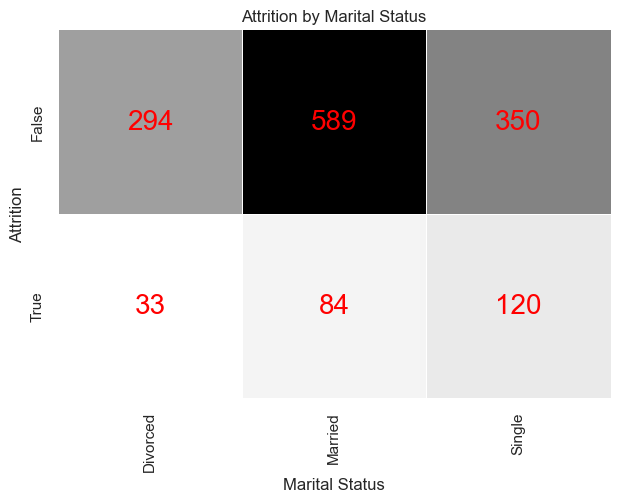

In [327]:
plt.figure()
sns.heatmap(contingency_table_marital, cmap='Greys', linewidths=.5, cbar=False, square=True)
num_rows, num_cols = contingency_table_marital.shape
for i in range(num_rows):
    for j in range(num_cols):
        plt.text(j + 0.5, i + 0.5, str(contingency_table_marital.iloc[i, j]), 
                 horizontalalignment='center', verticalalignment='center', fontsize=20, color = 'Red')
plt.title('Attrition by Marital Status')
plt.ylabel('Attrition')
plt.xlabel('Marital Status')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('married.png', dpi=600, bbox_inches='tight')
plt.show()

In [280]:
contingency_table_job = pd.crosstab(df['attrition'], df['jobrole'])
chi2, p, dof, expected = chi2_contingency(contingency_table_job)
print("Chi-squared test p-value:", p)
contingency_table_job

Chi-squared test p-value: 2.7524816380506567e-15


jobrole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
attrition,,,,,,,,,
False,122,40,197,97,135,78,245,269,50
True,9,12,62,5,10,2,47,57,33


In [289]:
contingency_table_gender = pd.crosstab(df['attrition'], df['gender'])
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)
print("Chi-squared test p-value:", p)
contingency_table_gender

Chi-squared test p-value: 0.29057244902890855


gender,Female,Male
attrition,,
False,501,732
True,87,150


In [285]:
contingency_table_travel = pd.crosstab(df['attrition'], df['businesstravel'])
chi2, p, dof, expected = chi2_contingency(contingency_table_travel)
print("Chi-squared test p-value:", p)
contingency_table_travel

Chi-squared test p-value: 5.608614476449931e-06


businesstravel,Non-Travel,Travel_Frequently,Travel_Rarely
attrition,,,
False,138,208,887
True,12,69,156


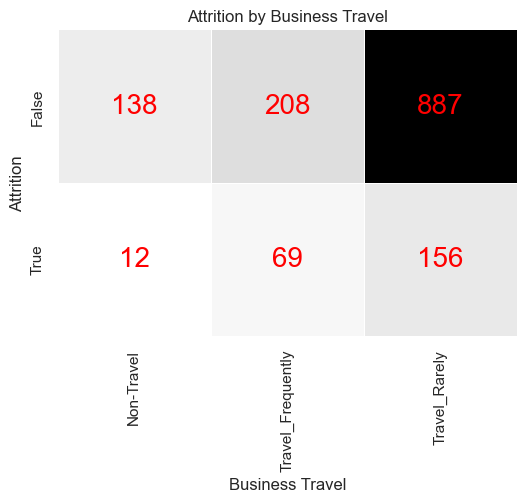

In [328]:
plt.figure()
sns.heatmap(contingency_table_travel, cmap='Greys', linewidths=.5, cbar=False, square=True)
num_rows, num_cols = contingency_table_travel.shape
for i in range(num_rows):
    for j in range(num_cols):
        plt.text(j + 0.5, i + 0.5, str(contingency_table_travel.iloc[i, j]), 
                 horizontalalignment='center', verticalalignment='center', fontsize=20, color = 'Red')
plt.title('Attrition by Business Travel')
plt.ylabel('Attrition')
plt.xlabel('Business Travel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('travel.png', dpi=600, bbox_inches='tight')
plt.show()

In [288]:
contingency_table_department = pd.crosstab(df['attrition'], df['department'])
chi2, p, dof, expected = chi2_contingency(contingency_table_department)
print("Chi-squared test p-value:", p)
contingency_table_department

Chi-squared test p-value: 0.004525606574479634


department,Human Resources,Research & Development,Sales
attrition,,,
False,51,828,354
True,12,133,92


**Creating Histograms for Numerical Columns to Observe Distribution of Data Values**

In [265]:
numerical_columns = ['age','education','environmentsatisfaction','jobsatisfaction','monthlyincome','numcompaniesworked'
                     ,'performancerating','totalworkingyears','trainingtimeslastyear','worklifebalance','yearsatcompany'
                     ,'yearsincurrentrole','yearssincelastpromotion','yearswithcurrmanager']

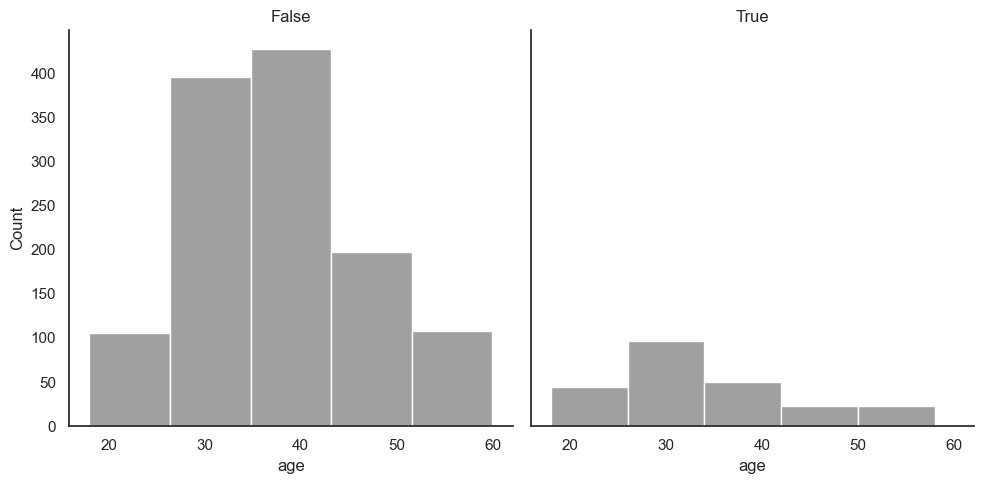

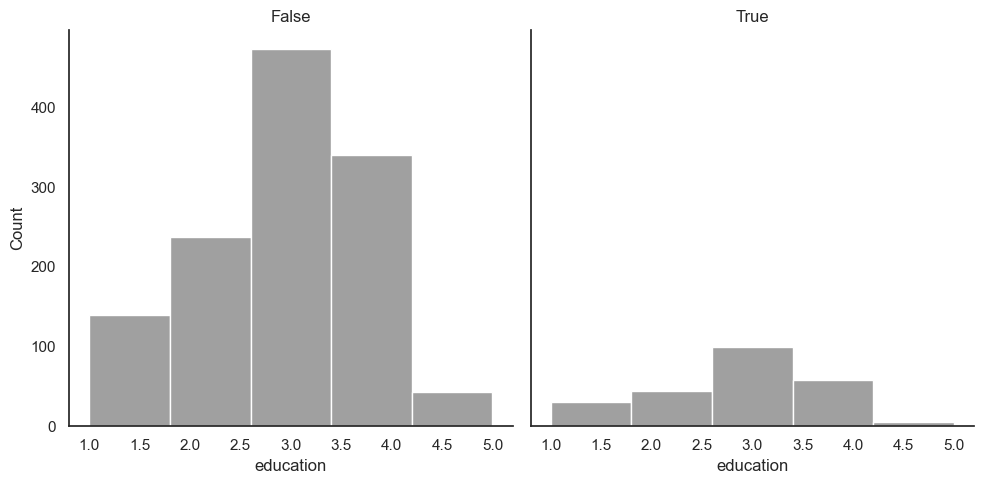

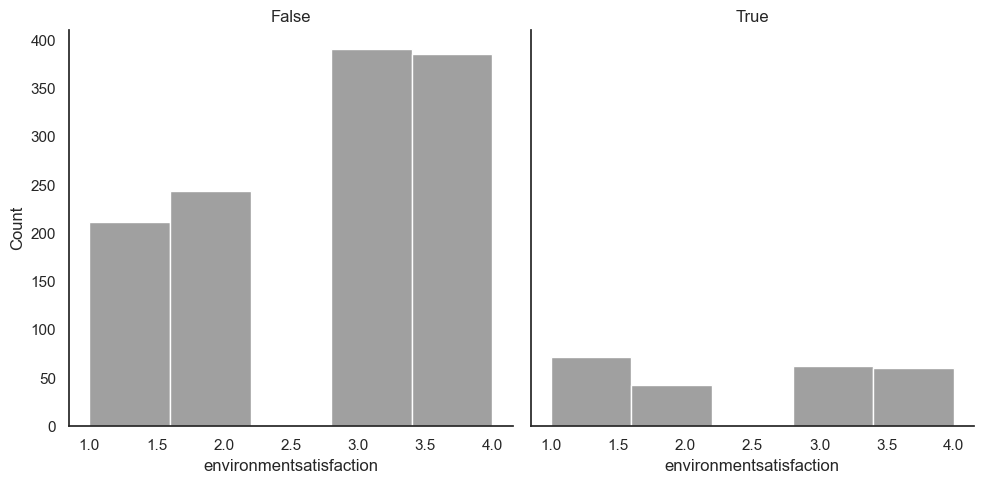

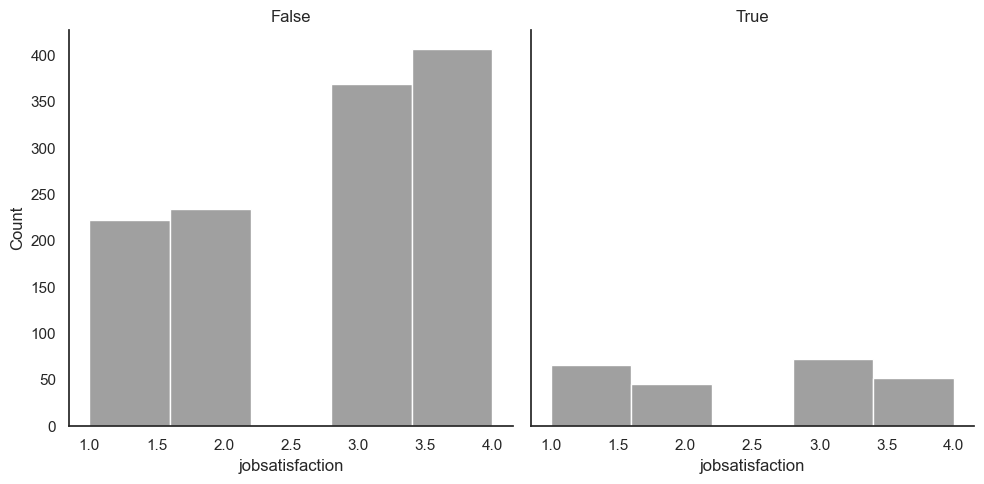

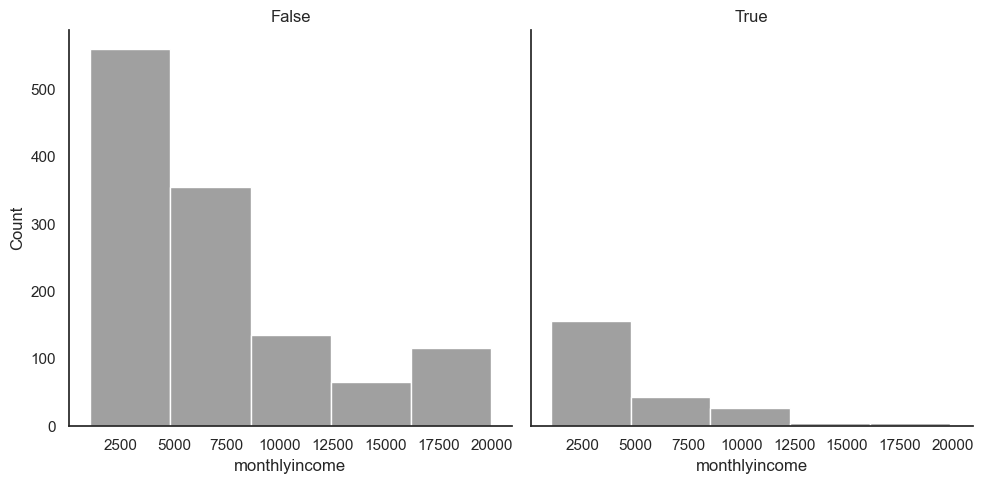

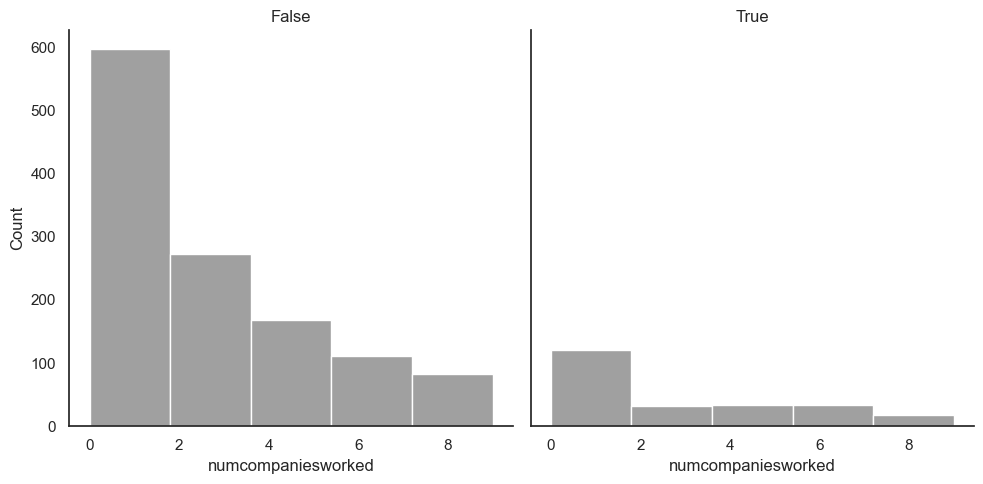

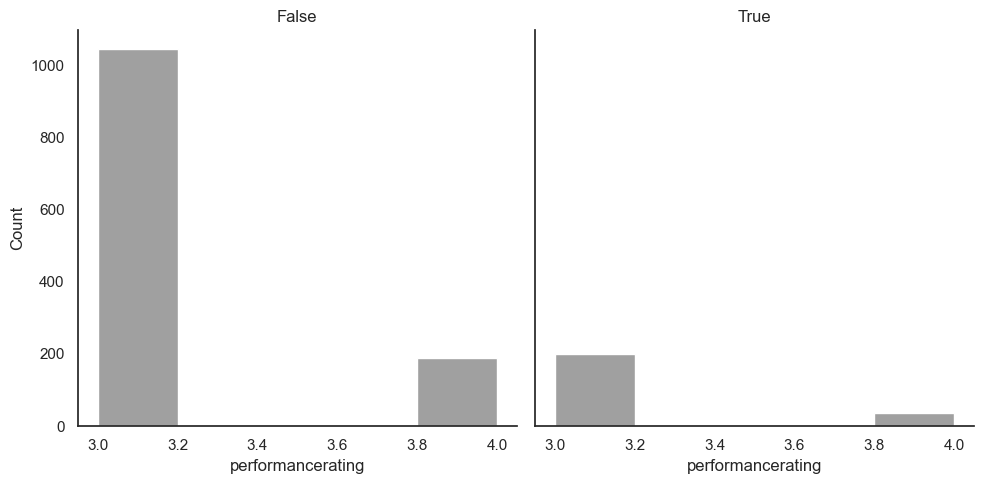

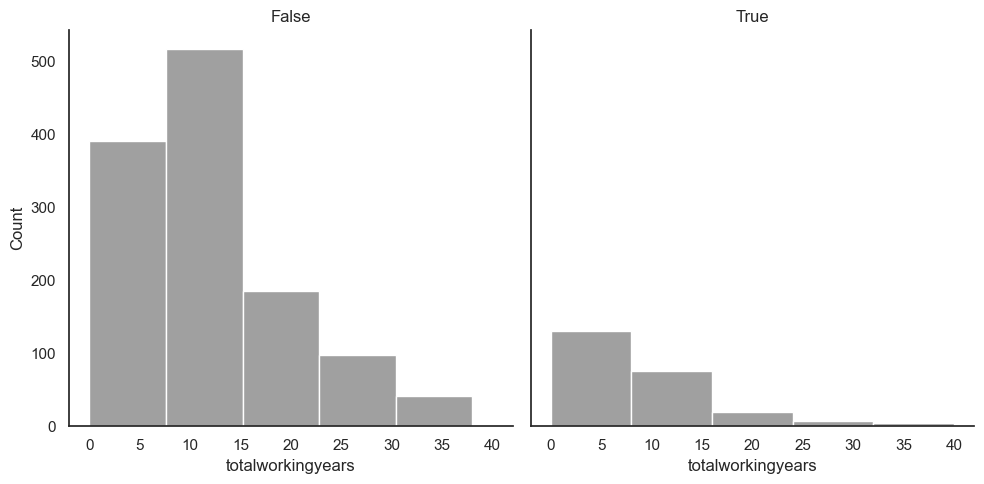

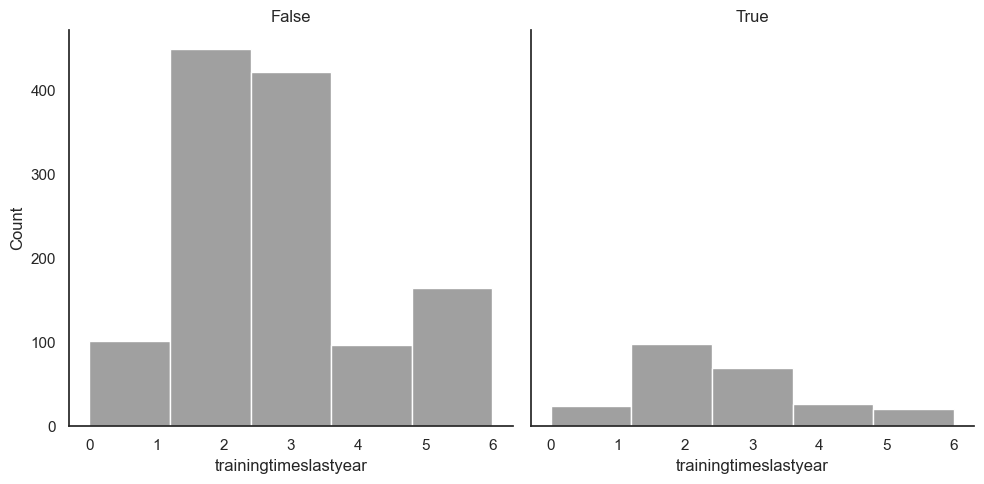

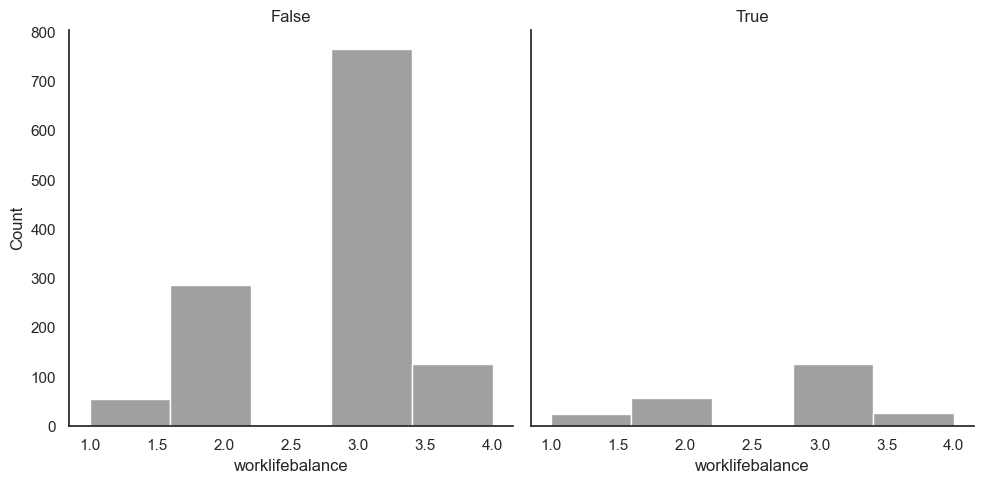

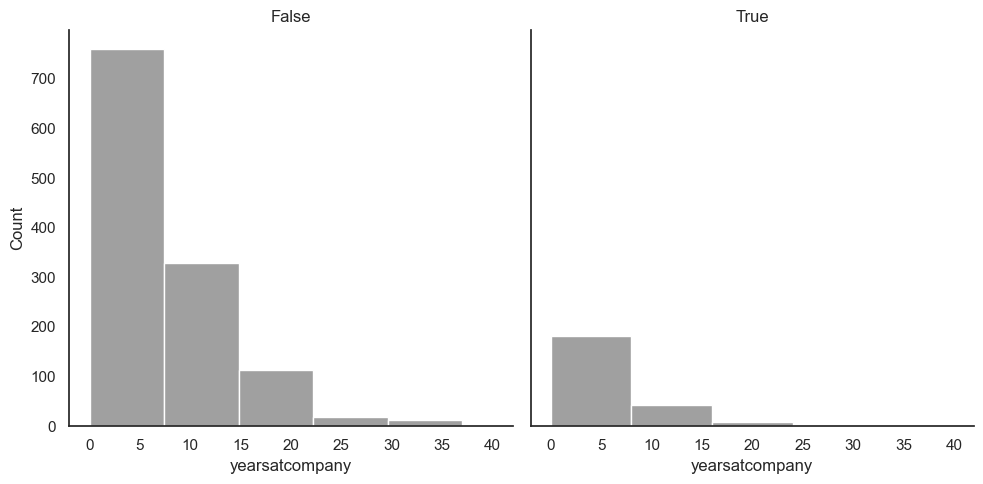

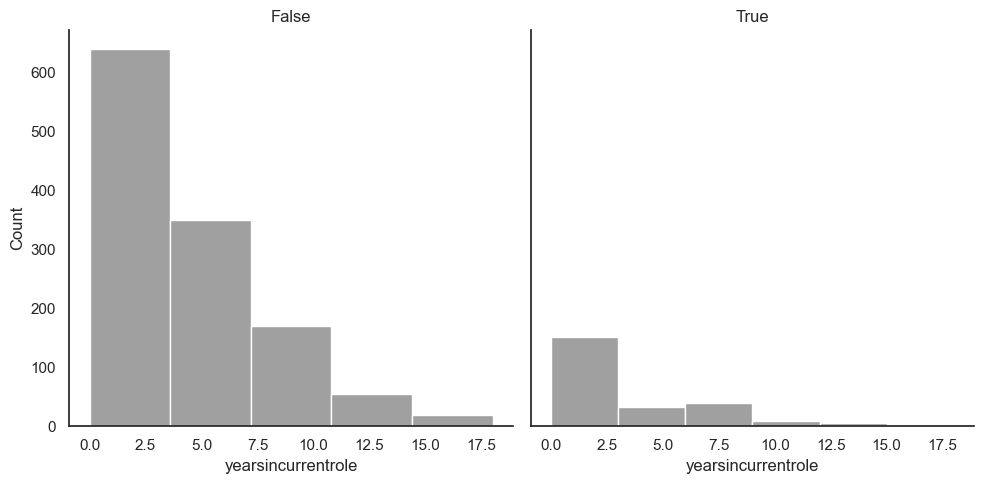

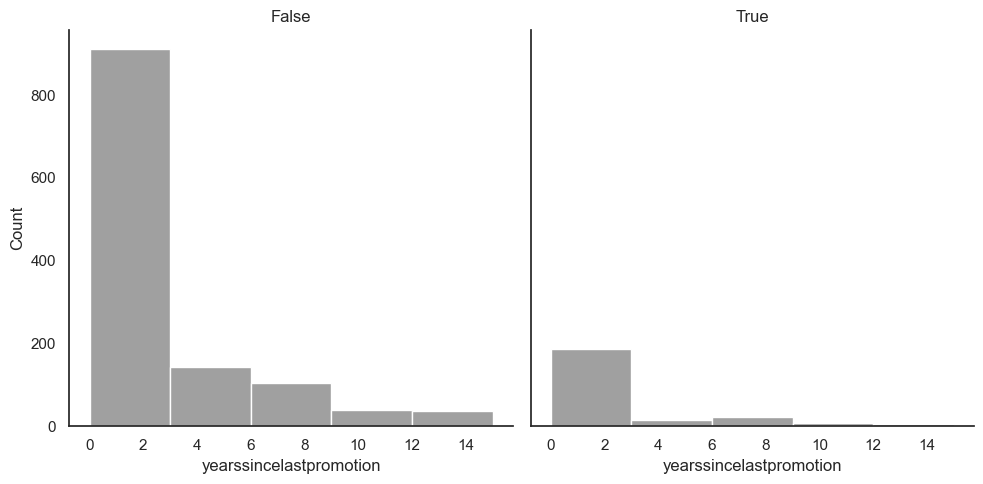

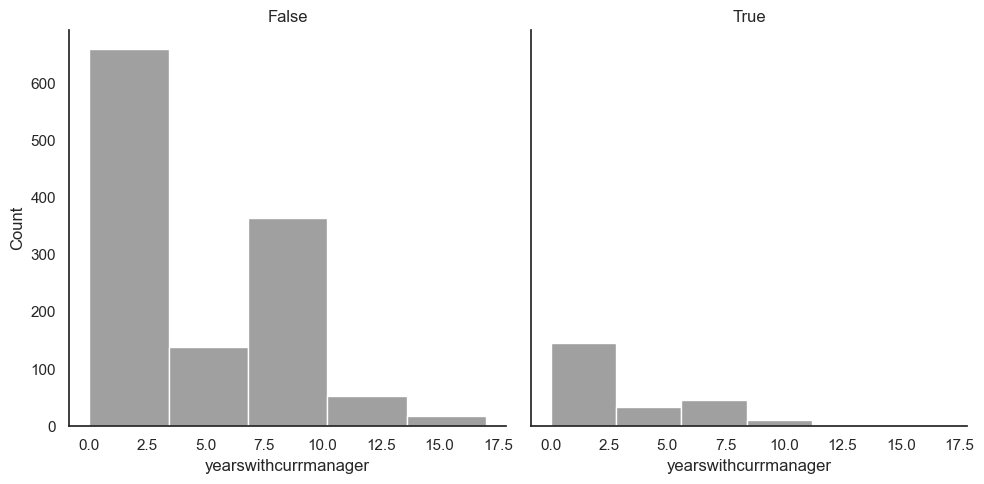

In [292]:
for num_col in numerical_columns:
    g = sns.FacetGrid(df, col='attrition', height=5, aspect=1)
    g.map_dataframe(sns.histplot, x=num_col, bins=5, color='gray')
    g.set_titles('{col_name}')
    g.set_titles(col_template="{col_name}")
    g.fig.subplots_adjust(top=0.9)
    for ax in g.axes.flat:
        ax.set_facecolor('white')  
        ax.grid(False)          
    plt.tight_layout()
    plt.show()

**Looking at the Correlation between Varaibles with Attrition Variable**

In [305]:
cors = df.corr()['attrition_encoded'].sort_values(ascending=False)
cors = cors.drop(['attrition_encoded', 'attrition'])

C:\Users\ekroo\AppData\Local\Temp\ipykernel_28588\2216584103.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cors = df.corr()['attrition_encoded'].sort_values(ascending=False)


In [306]:
print(cors)

maritalstatus_numerical     0.162070
jobrole_numerical           0.067151
department_numerical        0.063991
numcompaniesworked          0.043494
gender_numerical            0.029453
performancerating           0.002889
businesstravel_numerical    0.000074
employeenumber             -0.010577
education                  -0.031373
yearssincelastpromotion    -0.033019
trainingtimeslastyear      -0.059478
worklifebalance            -0.063939
environmentsatisfaction    -0.103369
jobsatisfaction            -0.103481
yearsatcompany             -0.134392
yearswithcurrmanager       -0.156199
age                        -0.159205
monthlyincome              -0.159840
yearsincurrentrole         -0.160545
totalworkingyears          -0.171063
Name: attrition_encoded, dtype: float64


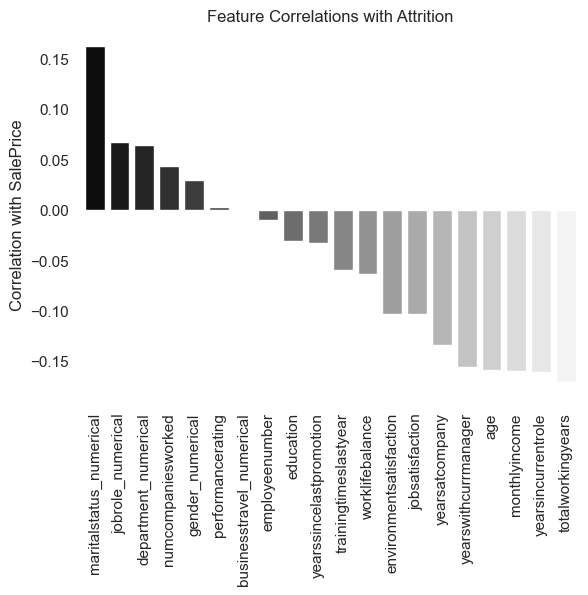

In [329]:
sns.set(style="white")
plt.figure()
sns.barplot(x=cors.index, y=cors, palette='gist_grey')
plt.xticks(rotation=90)
plt.ylabel('Correlation with SalePrice')
plt.title('Feature Correlations with Attrition')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.savefig('correlation.png', dpi=600, bbox_inches='tight')
plt.show()

**Running A Random Forest Regressor To See Feature Importance For Each Variable with Attrition**

In [191]:
X = df.drop(columns=['attrition', 'businesstravel', 'department','jobrole','maritalstatus', 'gender'])
y = df['attrition']

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
rm_model = RandomForestClassifier()
rm_model.fit(X_train,y_train)

RandomForestClassifier()

In [194]:
feature_importances = rm_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
5,monthlyincome,0.119453
0,age,0.094485
2,employeenumber,0.091288
8,totalworkingyears,0.077353
11,yearsatcompany,0.060086
6,numcompaniesworked,0.053048
14,yearswithcurrmanager,0.050083
3,environmentsatisfaction,0.047751
18,jobrole_numerical,0.047403
9,trainingtimeslastyear,0.046007


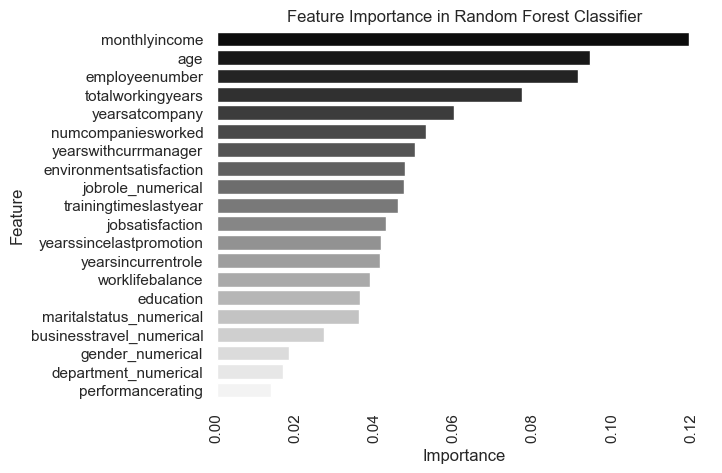

In [330]:
sns.set(style="white")
plt.figure()
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='gist_grey')
plt.xticks(rotation=90)
plt.title('Feature Importance in Random Forest Classifier')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.savefig('importance.png', dpi=600, bbox_inches='tight')
plt.show()

In [216]:
predictions = rm_model.predict(X_test)
probabilities = rm_model.predict_proba(X_test)[:, 0] 
max_probability_index = np.argmax(probabilities)
ideal_employee = X_test.iloc[[max_probability_index]]
ideal_employee_stay_probability = probabilities[max_probability_index]

In [215]:
ideal_employee

,age,education,employeenumber,environmentsatisfaction,jobsatisfaction,monthlyincome,numcompaniesworked,performancerating,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,businesstravel_numerical,department_numerical,gender_numerical,jobrole_numerical,maritalstatus_numerical
607,38,2,461,3,4,11510,0,3,12,3,3,11,10,2,9,2,1,1,5,0
